# Phase Diagram of HK and HKL Model in Two Dimensions

## 1. Find $\mu(\rho)$

### Setup

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

t = 1
d = 2

def I_1(x):
    if np.abs(x) <= 2*t:
        result = np.heaviside(x + 2*t, 1) - (1 / np.pi) * np.arccos(x / (2*t))
    else:
        result = np.heaviside(x + 2*t, 1)
    return result

def I_2(x):
    def I_1_shifted(k):
        return I_1(x + 2*t*np.cos(k))
    
    integral_value = integrate.quad(I_1_shifted, -np.pi, np.pi)
    
    return integral_value[0] / (2*np.pi)

def rho_hk_2d(mu, U):
    if U >= 0:
        return I_2(mu) + I_2(mu - U)
    elif U < 0:
        return 2 * I_2(mu - U/2)

def find_mu_of_rho_hk(rho, U):
    bracket = (-2*t*d, U + 2*t*d) # minimal and maximal values of mu
    func_mu = lambda mu: rho_hk_2d(mu, U) - rho
    result = root_scalar(func_mu, bracket=bracket, method='brentq')

    if result.converged:
        return result.root
    else:
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")

def create_mu_list(rho_array, U):
    mu_values = []
    for rho_i in rho_array:
        # print(rho_i)
        try:
            mu = find_mu_of_rho_hk(rho_i, U)
            mu_values.append(mu)
        except RuntimeError:
            mu_values.append(np.nan)
            print(f"Keine Nullstelle gefunden für rho={rho_i}")
    return mu_values

def one_plot(x_array, y_array,x_label, y_label, title):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.title(title)
    plt.show()

#### Testing Setup

/tmp/ipykernel_2805/1216555434.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_value = integrate.quad(I_1_shifted, -np.pi, np.pi)


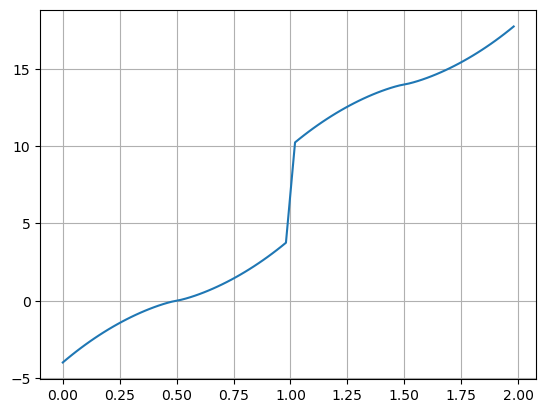

In [ ]:
rho_values = np.linspace(0, 2, 100, endpoint=False)

mu_values = create_mu_list(rho_values, 14)

one_plot(rho_values, mu_values, '','','')

## 2. Find $U_c(\rho)$

### Setup

In [14]:
def find_U_c_of_rho(rho):
    if rho <= 1:
        func_U = lambda U: find_mu_of_rho_hk(rho, U) + 2*t*d - U
        result = root_scalar(func_U, bracket=(0, 4*t*d), method='bisect')
    elif rho > 1:
        func_U = lambda U: find_mu_of_rho_hk(rho, U) - 2*t*d
        result = root_scalar(func_U, bracket=(0, 4*t*d), method='bisect')

    if result.converged:
        return result.root
    else:
        print(result.flag)
        raise RuntimeError(f"Keine Nullstelle gefunden für rho={rho}")
    
def create_U_c_array(rho_array):
    U_c_list = []

    for rho_i in rho_array:
        print(rho_i)
        try:
            U_i = find_U_c_of_rho(rho_i)
            U_c_list.append(U_i)
        except RuntimeError:
            U_c_list.append(np.nan)
            print(f"Keine Nullstelle gefunden für rho={rho_i}")

    U_c_array = np.array(U_c_list)

    return U_c_array

### Calculation

In [15]:
U_c_hk = create_U_c_array(rho_values)

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5


/tmp/ipykernel_2805/1216555434.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_value = integrate.quad(I_1_shifted, -np.pi, np.pi)


0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.72
0.74
0.76
0.78
0.8
0.8200000000000001
0.84
0.86
0.88
0.9
0.92
0.9400000000000001
0.96
0.98
1.0
1.02
1.04
1.06
1.08
1.1
1.12
1.1400000000000001
1.16
1.18
1.2
1.22
1.24
1.26
1.28
1.3
1.32
1.34
1.36
1.3800000000000001
1.4000000000000001
1.42
1.44
1.46
1.48
1.5
1.52
1.54
1.56
1.58
1.6
1.62
1.6400000000000001
1.6600000000000001
1.68
1.7
1.72
1.74
1.76
1.78
1.8
1.82
1.84
1.86
1.8800000000000001
1.9000000000000001
1.92
1.94
1.96
1.98


### Plots

#### Checking

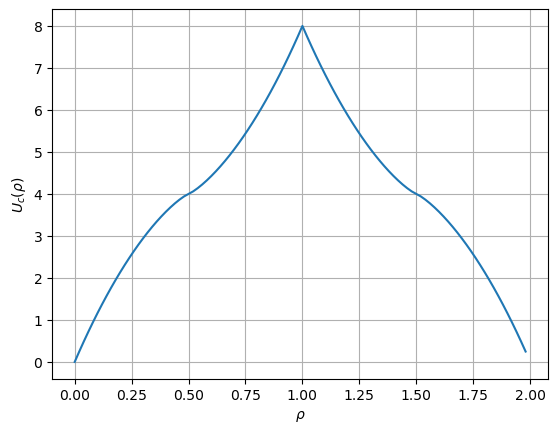

In [17]:
one_plot(rho_values, U_c_hk, r'$\rho$', r'$U_c(\rho)$', '')

#### State Diagram

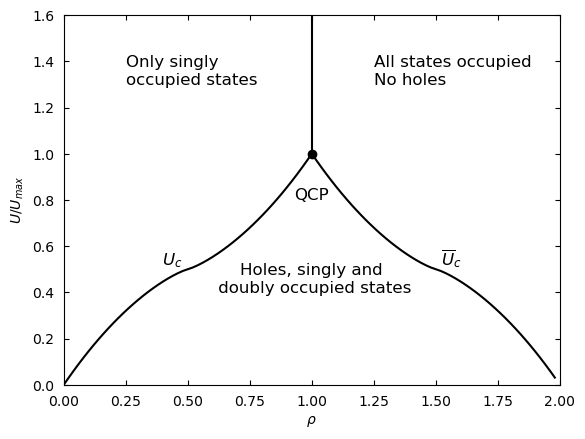

In [21]:
from matplotlib.ticker import MultipleLocator

U_c_hk_normalized = U_c_hk / (4*t*d)

def phase_diagram(x_values, y_values, x_label, y_label, y_max, title='none', legend=False, fill=True, alph=1):    
    # Create the plot
    fig, ax = plt.subplots()
    
    # Plot the dividing curve
    ax.plot(x_values, y_values, label=r'$U_c$', color='black')
    
    # Plot the vertical line at x = 1, starting from y=1 upwards
    ax.vlines(x=1, ymin=1, ymax=y_max, color='black', linestyle='-', label='MIT')
    
    # Fill areas for visualization (optional)
    if fill:
        ax.fill_between(x_values, y_values, y_max, where=(x_values < 1), 
                        interpolate=True, color='#DF1728', alpha=alph, label='Area 1')
        
        ax.fill_between(x_values, y_values, y_max, where=(x_values > 1), 
                        interpolate=True, color='#4E3DE1', alpha=alph, label='Area 2')
        
        ax.fill_between(x_values, 0, y_values, color='#B11CC2',
                         alpha=alph, label='Area 3 (Above Curve)')
    
    ax.plot(1, 1, marker='o', color='black', markersize=6, label='QCP')
    
    ax.text(1, 0.8, 'QCP', fontsize=12, color='black', ha='center')
    ax.text(0.25, 1.3, 'Only singly \noccupied states', fontsize=12, color='black', ha='left')
    ax.text(1.25, 1.3, 'All states occupied\nNo holes', fontsize=12, color='black', ha='left')
    ax.text(1, 0.4, 'Holes, singly and\n doubly occupied states', fontsize=12, color='black', ha='center')
    ax.text(0.48, 0.52, r'$U_c$', fontsize=12, color='black', ha='right')
    ax.text(1.52, 0.52, r'$\overline{U}_c$', fontsize=12, color='black', ha='left')
    
    # Labels and legend
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if title != 'none':
        ax.set_title(title)
    if legend == True:
        ax.legend()
    ax.set_xlim(0, 2)
    ax.set_ylim(0, y_max)
    ax.tick_params(top=True, right=True, direction='in', pad=7)
    # Set major tick intervals
    ax.xaxis.set_major_locator(MultipleLocator(0.25))  # x-axis ticks every 0.2 units
    ax.yaxis.set_major_locator(MultipleLocator(0.2))  # y-axis ticks every 0.5 units

    plt.show()
    
phase_diagram(rho_values, U_c_hk_normalized, r'$\rho$', r'$U / U_{max}$', 1.6, fill=False, alph=0.6)